In [1]:
!nvidia-smi

Sun Sep 22 15:27:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9


Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 19.17 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9


In [4]:
import gdown

# Extract the file ID from the Google Drive link
file_id = "1-cEzy0owc7D83miA-Bj7QWvxmESST0z3"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Dataset.zip"

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1-cEzy0owc7D83miA-Bj7QWvxmESST0z3
From (redirected): https://drive.google.com/uc?id=1-cEzy0owc7D83miA-Bj7QWvxmESST0z3&confirm=t&uuid=c6af2293-9e58-40c8-b443-8bc004f3d0d7
To: /content/yolov9/Dataset.zip
100%|██████████| 97.5M/97.5M [00:04<00:00, 24.3MB/s]


'Dataset.zip'

In [5]:
!unzip /content/yolov9/Dataset.zip

Archive:  /content/yolov9/Dataset.zip
   creating: Dataset/
   creating: Dataset/custom_dataset/
   creating: Dataset/custom_dataset/train/
   creating: Dataset/custom_dataset/train/images/
  inflating: Dataset/custom_dataset/train/images/1.jpg  
  inflating: Dataset/custom_dataset/train/images/10.jpg  
  inflating: Dataset/custom_dataset/train/images/100.jpg  
  inflating: Dataset/custom_dataset/train/images/101.jpg  
  inflating: Dataset/custom_dataset/train/images/102.jpg  
  inflating: Dataset/custom_dataset/train/images/104.jpg  
  inflating: Dataset/custom_dataset/train/images/105.jpg  
  inflating: Dataset/custom_dataset/train/images/106.jpg  
  inflating: Dataset/custom_dataset/train/images/107.jpg  
  inflating: Dataset/custom_dataset/train/images/108.jpg  
  inflating: Dataset/custom_dataset/train/images/109.jpg  
  inflating: Dataset/custom_dataset/train/images/11.jpg  
  inflating: Dataset/custom_dataset/train/images/110.jpg  
  inflating: Dataset/custom_dataset/train/image

## in requirements.txt file update the Pillow==9.5.0

In [6]:

!pip install -q roboflow
!pip install -r requirements.txt -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 351.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00


In [7]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [8]:
!ls -la {HOME}/weights

total 402448
drwxr-xr-x 2 root root      4096 Sep 22 15:27 .
drwxr-xr-x 1 root root      4096 Sep 22 15:27 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [9]:
%cd {HOME}/yolov9



/content/yolov9


## Update the path in data.yaml

In [10]:
!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/Dataset/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

2024-09-22 15:28:27.627497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 15:28:27.664240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 15:28:27.675321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 15:28:27.704065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 15:28:30.549062: W tensorflow/compiler/tf2

In [11]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				   PR_curve.png		  val_batch0_pred.jpg
events.out.tfevents.1727018912.275cc30f1420.866.0  R_curve.png		  val_batch1_labels.jpg
F1_curve.png					   results.csv		  val_batch1_pred.jpg
hyp.yaml					   results.png		  val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch0.jpg	  val_batch2_pred.jpg
labels.jpg					   train_batch1.jpg	  weights
opt.yaml					   train_batch2.jpg
P_curve.png					   val_batch0_labels.jpg


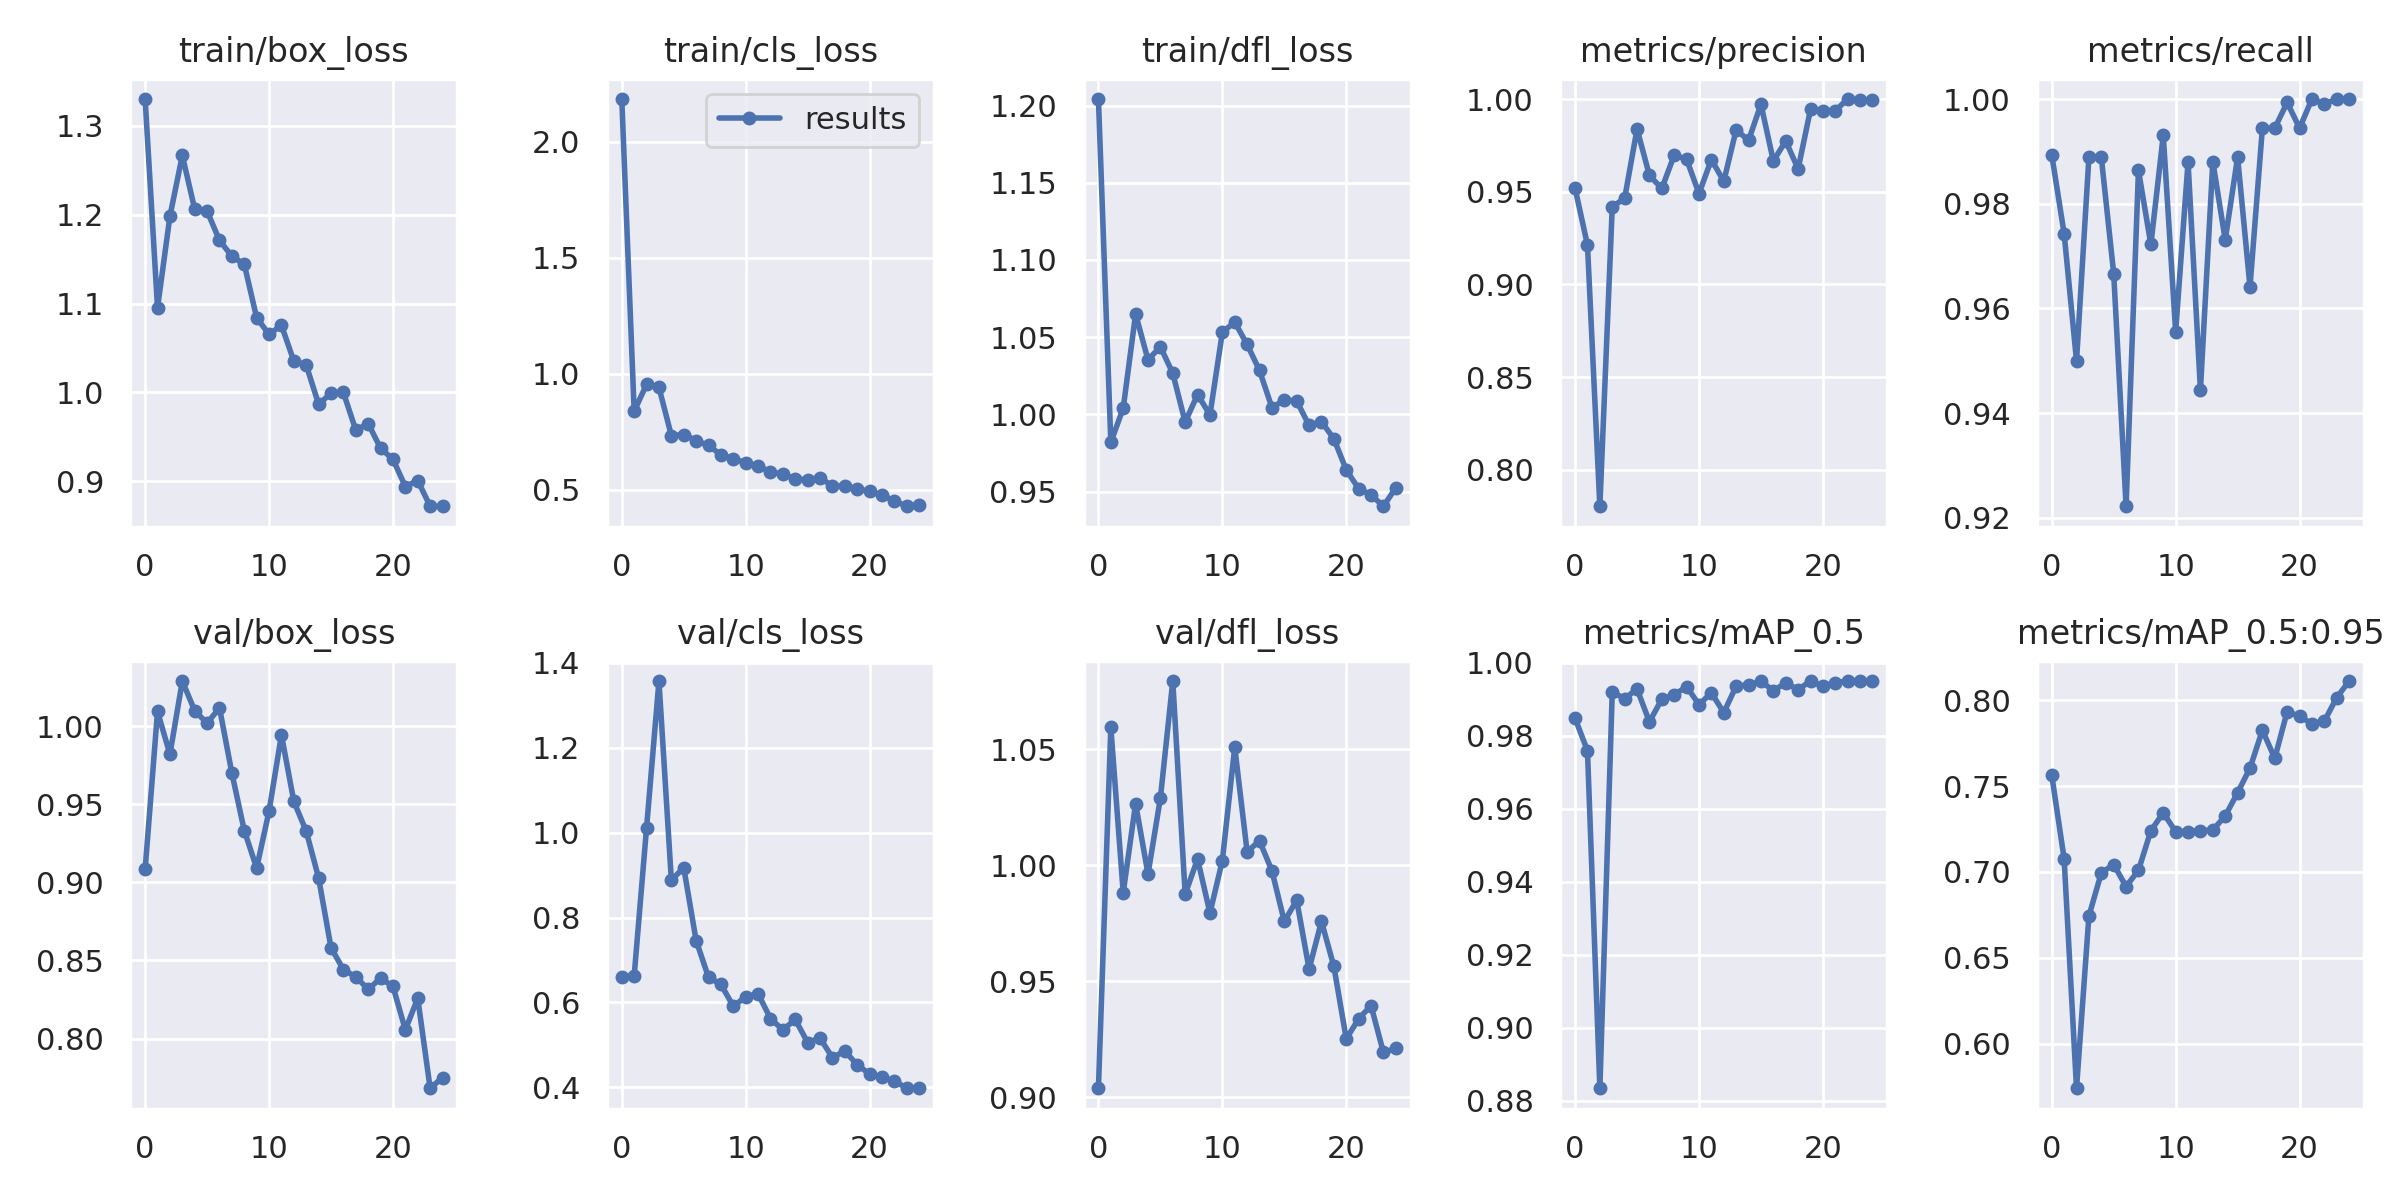

In [12]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

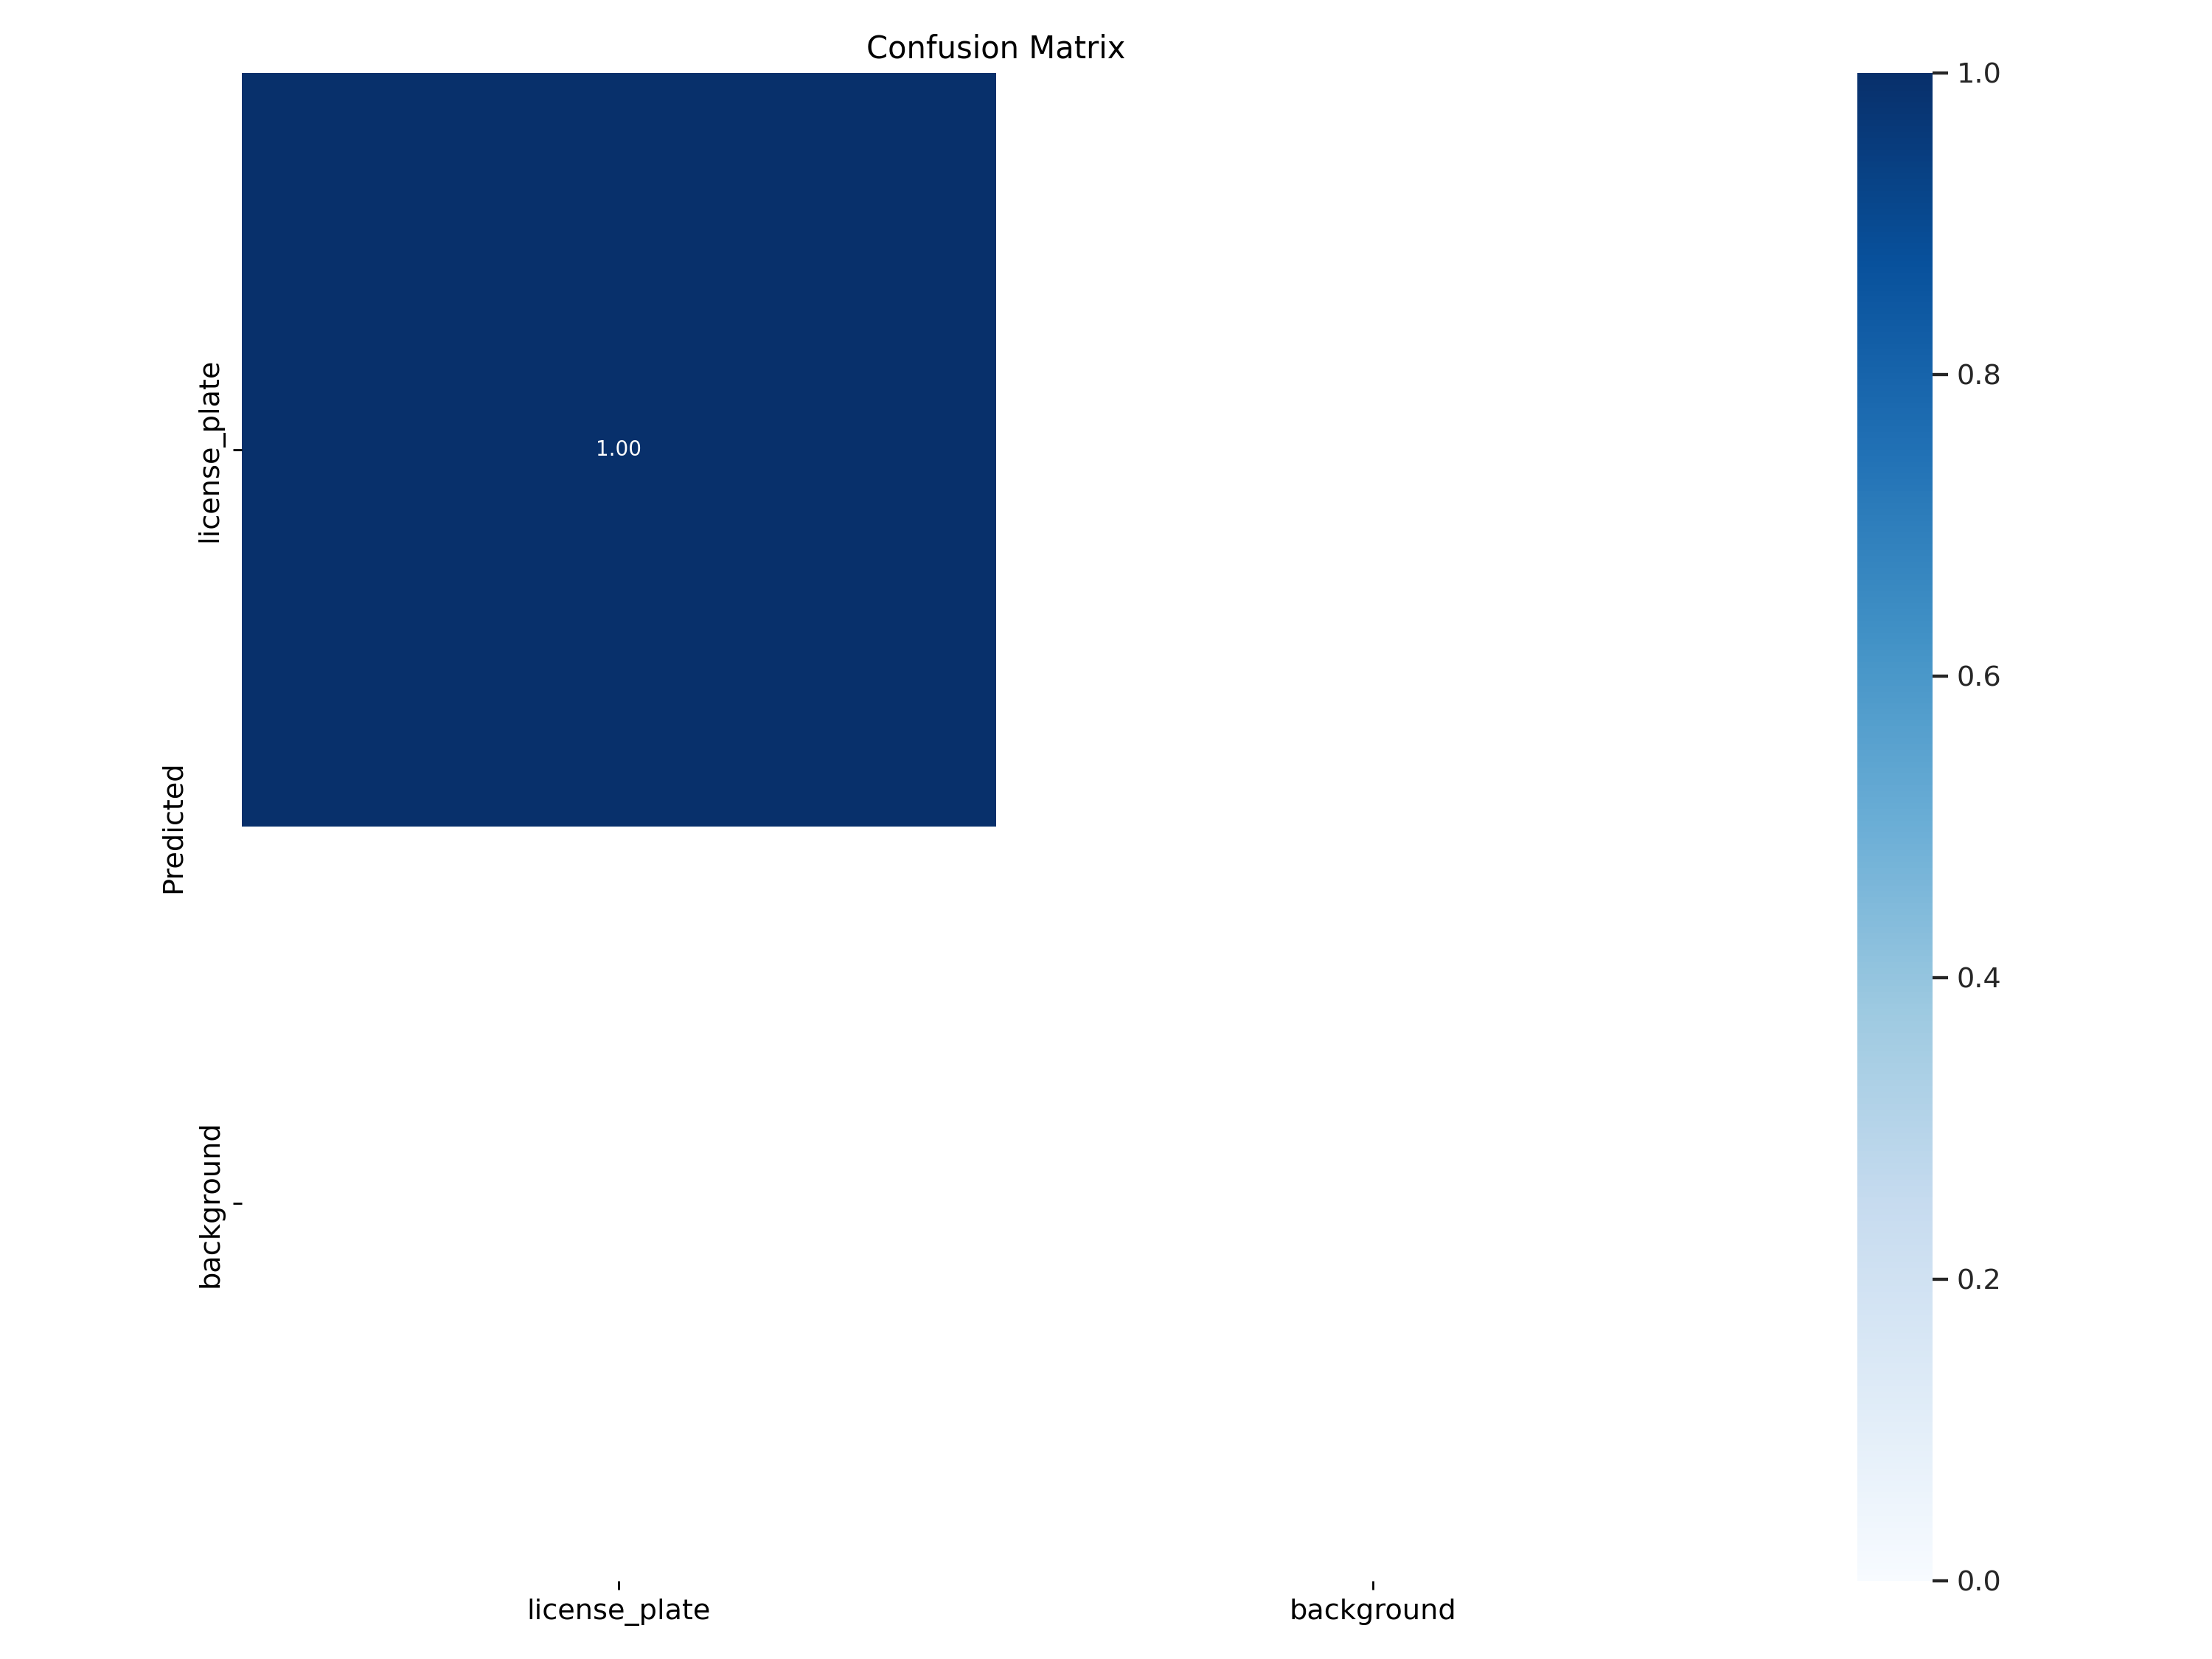

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

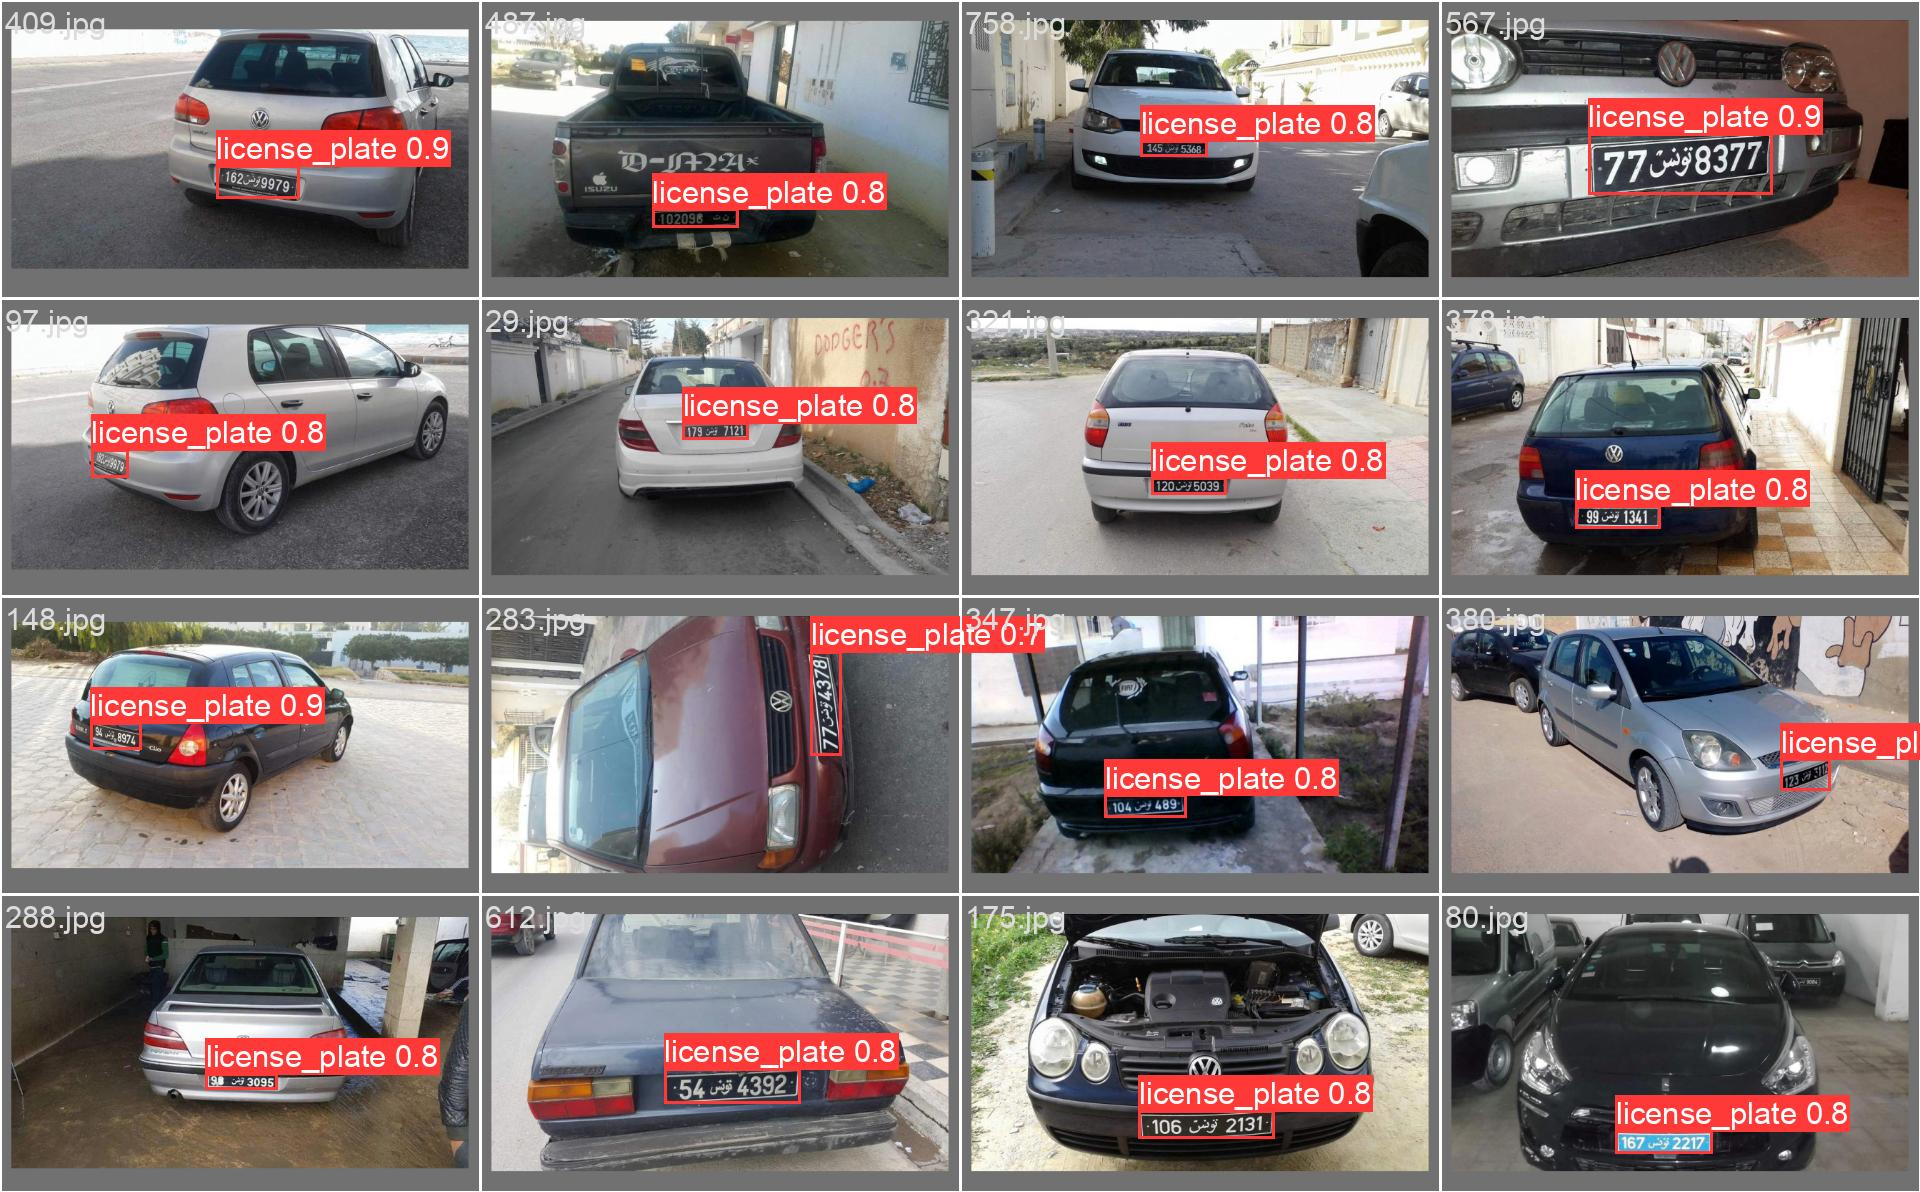

In [14]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

In [15]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data /content/yolov9/Dataset/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Dataset/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions t

In [16]:
import requests

# File ID
file_id = '1-WACauJb0z8wWuxHa5-OSN8YK1IiJQky'
# Create the direct download link
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Send a request to download the file
response = requests.get(url)

# Save the file with the desired name and extension
with open('test.zip', 'wb') as file:
    file.write(response.content)

print("Download complete!")


Download complete!


In [17]:
!unzip test.zip

Archive:  test.zip
   creating: test/test/
  inflating: test/test/1000.jpg      
  inflating: test/test/1001.jpg      
  inflating: test/test/1002.jpg      
  inflating: test/test/1003.jpg      
  inflating: test/test/1004.jpg      
  inflating: test/test/1005.jpg      
  inflating: test/test/1006.jpg      
  inflating: test/test/1007.jpg      
  inflating: test/test/1008.jpg      
  inflating: test/test/1009.jpg      
  inflating: test/test/1010.jpg      
  inflating: test/test/1011.jpg      
  inflating: test/test/1012.jpg      
  inflating: test/test/1013.jpg      
  inflating: test/test/1014.jpg      
  inflating: test/test/1015.jpg      
  inflating: test/test/1016.jpg      
  inflating: test/test/1017.jpg      
  inflating: test/test/1018.jpg      
  inflating: test/test/1019.jpg      
  inflating: test/test/1020.jpg      
  inflating: test/test/1021.jpg      
  inflating: test/test/1022.jpg      
  inflating: test/test/1023.jpg      
  inflating: test/test/1024.jpg      
  infla

## In detect.py add a if condition if conf>0.5

In [20]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source /content/yolov9/test/test/  --save-txt

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/test/test/, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default 

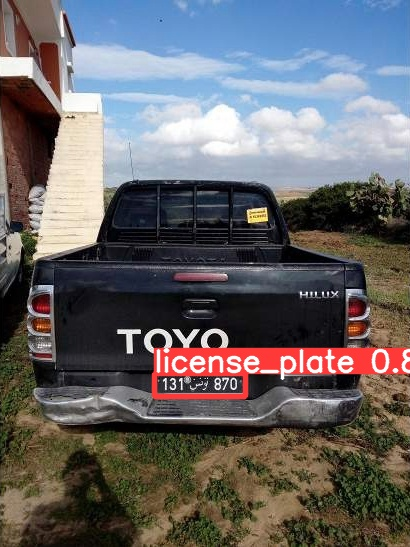

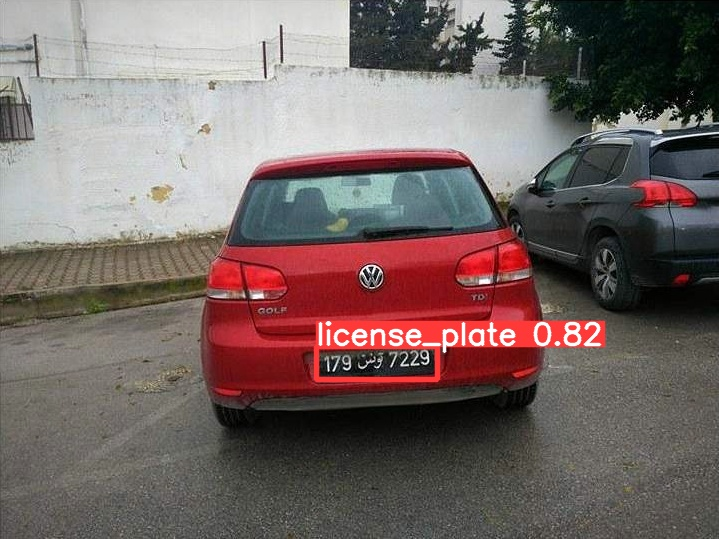

In [21]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## Move the labels folder from runs/detect to runs

In [22]:
import os
import cv2

# Define paths
image_folder = '/content/yolov9/runs/detect/exp3'  # Folder with images
label_folder = '/content/yolov9/runs/detect/labels'  # Folder with YOLO annotations (txt files)
output_folder = '/content/cropped/'  # Folder to save cropped images

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through each image file
for image_file in os.listdir(image_folder):
    if image_file.endswith(".jpg") or image_file.endswith(".png"):
        image_path = os.path.join(image_folder, image_file)
        label_file = os.path.splitext(image_file)[0] + ".txt"  # Find corresponding .txt file
        label_path = os.path.join(label_folder, label_file)

        # Check if the label file exists
        if os.path.exists(label_path):
            # Load the image
            image = cv2.imread(image_path)
            height, width, _ = image.shape

            # Open the label file and read the bounding box data
            with open(label_path, "r") as f:
                for idx, line in enumerate(f.readlines()):
                    # Read the class ID and bounding box coordinates from the label file
                    class_id, x_center, y_center, box_width, box_height = map(float, line.strip().split())

                    # Convert YOLO format (normalized) to pixel values
                    x_center = int(x_center * width)
                    y_center = int(y_center * height)
                    box_width = int(box_width * width)
                    box_height = int(box_height * height)

                    # Calculate top-left and bottom-right coordinates
                    x_min = int(x_center - box_width / 2)
                    y_min = int(y_center - box_height / 2)
                    x_max = int(x_center + box_width / 2)
                    y_max = int(y_center + box_height / 2)

                    # Ensure the coordinates are within the image boundaries
                    x_min = max(0, x_min)
                    y_min = max(0, y_min)
                    x_max = min(width, x_max)
                    y_max = min(height, y_max)

                    # Crop the detected object from the image
                    cropped_img = image[y_min:y_max, x_min:x_max]

                    # Check if the cropped image is valid (non-empty)
                    if cropped_img.size > 0:
                        # Create a subfolder for each class ID (optional)
                        class_folder = os.path.join(output_folder, f"class_{int(class_id)}")
                        if not os.path.exists(class_folder):
                            os.makedirs(class_folder)

                        # Save the cropped image with a unique name (original image name + index)
                        output_image_path = os.path.join(class_folder, f"{os.path.splitext(image_file)[0]}_{idx}.jpg")
                        cv2.imwrite(output_image_path, cropped_img)
                    else:
                        print(f"Skipping empty crop for {image_file}")

print("Object detection, cropping, and saving complete.")


Object detection, cropping, and saving complete.


In [23]:
%cd ..

/content


In [24]:
!pwd

/content


## **TROCR**

In [1]:
!pip install -q transformers

In [27]:
!pip install Pillow==10.4.0

  Using cached pillow-10.4.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.2 kB)
Using cached pillow-10.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


In [2]:
!pip install -q datasets jiwer

In [3]:
import gdown

# Extracted file ID
file_id = "1xZ58yP5Mv5U_HPeManjKi3oF9nTrOAJZ"
url = f"https://drive.google.com/uc?id={file_id}"
output = "Dataset.zip"

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1xZ58yP5Mv5U_HPeManjKi3oF9nTrOAJZ
To: /content/Dataset.zip
100%|██████████| 4.13M/4.13M [00:00<00:00, 51.0MB/s]


'Dataset.zip'

In [4]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: TR/
   creating: TR/eval/
  inflating: TR/eval/601.jpg         
  inflating: TR/eval/602.jpg         
  inflating: TR/eval/603.jpg         
  inflating: TR/eval/604.jpg         
  inflating: TR/eval/605.jpg         
  inflating: TR/eval/606.jpg         
  inflating: TR/eval/607.jpg         
  inflating: TR/eval/608.jpg         
  inflating: TR/eval/609.jpg         
  inflating: TR/eval/610.jpg         
  inflating: TR/eval/611.jpg         
  inflating: TR/eval/612.jpg         
  inflating: TR/eval/613.jpg         
  inflating: TR/eval/614.jpg         
  inflating: TR/eval/615.jpg         
  inflating: TR/eval/616.jpg         
  inflating: TR/eval/617.jpg         
  inflating: TR/eval/618.jpg         
  inflating: TR/eval/619.jpg         
  inflating: TR/eval/620.jpg         
  inflating: TR/eval/621.jpg         
  inflating: TR/eval/622.jpg         
  inflating: TR/eval/623.jpg         
  inflating: TR/eval/624.jpg         
  inflating: TR/ev

In [5]:
import os  # Ensure os is imported
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
from PIL import Image
from transformers import TrOCRProcessor

# Read the fixed-width formatted file
df = pd.read_fwf('/content/TR/metadata.txt', header=None)

# Split the combined column into two separate columns
df[['file_name', 'text']] = df[0].str.split(' ', expand=True)

# Display the DataFrame to check the structure
print(df.head())
print(df.columns)  # Check the column names

# Fix file names ending with 'jp' by adding 'g'
df['file_name'] = df['file_name'].apply(lambda x: x + 'g' if x.endswith('jp') else x)

# Display the DataFrame after modifications
print(df.head())

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

class IAMDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Get file name and text
        file_name = self.df['file_name'][idx]
        text = self.df['text'][idx]

        # Prepare image (i.e., resize + normalize)
        image = Image.open(os.path.join(self.root_dir, file_name)).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values

        # Add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text,
                                          padding="max_length",
                                          max_length=self.max_target_length).input_ids

        # Important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

# Initialize the processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

# Create datasets
train_dataset = IAMDataset(root_dir='/content/TR/train',
                           df=train_df,
                           processor=processor)

eval_dataset = IAMDataset(root_dir='/content/TR/eval',
                           df=test_df,
                           processor=processor)

# Print dataset sizes
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

# Check encoding for the first training example
encoding = train_dataset[0]
for k, v in encoding.items():
    print(k, v.shape)


                0 file_name      text
0  0.jpg 117T3989     0.jpg  117T3989
1  1.jpg 128T8086     1.jpg  128T8086
2  2.jpg 170T6123     2.jpg  170T6123
3  3.jpg 103T1643     3.jpg  103T1643
4   4.jpg 62T1040     4.jpg   62T1040
Index([0, 'file_name', 'text'], dtype='object')
                0 file_name      text
0  0.jpg 117T3989     0.jpg  117T3989
1  1.jpg 128T8086     1.jpg  128T8086
2  2.jpg 170T6123     2.jpg  170T6123
3  3.jpg 103T1643     3.jpg  103T1643
4   4.jpg 62T1040     4.jpg   62T1040


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Number of training examples: 473
Number of validation examples: 119
pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


In [6]:
# Get the file name and construct the full path
file_name = train_df['file_name'][0]
file_path = os.path.join(train_dataset.root_dir, file_name)

# Print the full path for debugging
print(f"Attempting to open: {file_path}")

# Check if the file exists before opening
if os.path.exists(file_path):
    image = Image.open(file_path).convert("RGB")
else:
    print(f"File not found: {file_path}")


Attempting to open: /content/TR/train/110.jpg


In [ ]:
labels = encoding['labels']
labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print(label_str)

172T9314


In [7]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")

config.json:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [8]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [9]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    fp16=True,
    output_dir="./",
    logging_steps=2,
    save_steps=1000,
    eval_steps=200,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [10]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

In [11]:
from transformers import default_data_collator

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/models/trocr/processing_trocr.py:137: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


Step,Training Loss,Validation Loss


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 64, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. This warning will be 

TrainOutput(global_step=180, training_loss=1.025983135567771, metrics={'train_runtime': 168.0816, 'train_samples_per_second': 8.442, 'train_steps_per_second': 1.071, 'total_flos': 1.255666644487766e+18, 'train_loss': 1.025983135567771, 'epoch': 3.0})

In [13]:
import os
import torch
from PIL import Image

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to predict the text for a single image
def predict_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values.to(device)  # Move to the same device as the model

    # Perform inference
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)

    # Decode the generated ids to text
    predicted_text = processor.tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return predicted_text

# Function to predict for all images in a folder and save results as text files
def predict_and_save_results(image_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the image folder
    for image_file in os.listdir(image_folder):
        if image_file.endswith(".jpg") or image_file.endswith(".png"):  # Handle image formats
            image_path = os.path.join(image_folder, image_file)

            # Predict text for the image
            predicted_text = predict_image(image_path)

            # Create the output .txt file path
            txt_file_name = os.path.splitext(image_file)[0] + ".txt"  # Same name as image but with .txt extension
            txt_file_path = os.path.join(output_folder, txt_file_name)

            # Save the predicted text to the file
            with open(txt_file_path, 'w') as f:
                f.write(predicted_text)

            print(f"Saved predicted text for {image_file} to {txt_file_path}")

# Specify the input folder containing images and the output folder for text files
image_folder = '/content/cropped/class_0'  # Folder containing the images
output_folder = '/content/TR/predicted_texts'  # Folder to save the predicted text files

# Predict and save results for all images in the folder
predict_and_save_results(image_folder, output_folder)

print("All predictions saved.")


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


Saved predicted text for 964_0.jpg to /content/TR/predicted_texts/964_0.txt
Saved predicted text for 1100_0.jpg to /content/TR/predicted_texts/1100_0.txt
Saved predicted text for 1066_0.jpg to /content/TR/predicted_texts/1066_0.txt
Saved predicted text for 1003_0.jpg to /content/TR/predicted_texts/1003_0.txt
Saved predicted text for 1009_0.jpg to /content/TR/predicted_texts/1009_0.txt
Saved predicted text for 937_0.jpg to /content/TR/predicted_texts/937_0.txt
Saved predicted text for 925_0.jpg to /content/TR/predicted_texts/925_0.txt
Saved predicted text for 1051_0.jpg to /content/TR/predicted_texts/1051_0.txt
Saved predicted text for 1008_1.jpg to /content/TR/predicted_texts/1008_1.txt
Saved predicted text for 1070_0.jpg to /content/TR/predicted_texts/1070_0.txt
Saved predicted text for 1045_0.jpg to /content/TR/predicted_texts/1045_0.txt
Saved predicted text for 1061_0.jpg to /content/TR/predicted_texts/1061_0.txt
Saved predicted text for 966_0.jpg to /content/TR/predicted_texts/966_

In [14]:
!zip -r /content/predicted_texts.zip /content/TR/predicted_texts

  adding: content/TR/predicted_texts/ (stored 0%)
  adding: content/TR/predicted_texts/1052_0.txt (stored 0%)
  adding: content/TR/predicted_texts/943_0.txt (stored 0%)
  adding: content/TR/predicted_texts/922_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1060_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1084_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1000_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1070_0.txt (stored 0%)
  adding: content/TR/predicted_texts/940_0.txt (stored 0%)
  adding: content/TR/predicted_texts/938_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1013_0.txt (stored 0%)
  adding: content/TR/predicted_texts/941_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1071_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1049_0.txt (stored 0%)
  adding: content/TR/predicted_texts/966_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1108_0.txt (stored 0%)
  adding: content/TR/predicted_texts/1006_0.txt (stored 

In [18]:
import csv
import os

def text_to_csv(text_file, base_id, csv_data):
    with open(text_file, 'r') as file:
        content = file.read().strip()
    row_id = 1
    for char in content:
        if char.isdigit():
            row = [f"{base_id}_{row_id}"]
            digit_row = [0] * 10
            digit_row[int(char)] = 1
            row.extend(digit_row)
            csv_data.append(row)
            row_id += 1

def  to_csv(input_dir, csv_file):
    columns = ['ID'] + [str(i) for i in range(10)]

    csv_data = []

    for filename in os.listdir(input_dir):
        if filename.endswith('.txt'):
            base_id = os.path.splitext(filename)[0].split('_')[0]
            input_file = os.path.join(input_dir, filename)
            text_to_csv(input_file, base_id, csv_data)
    with open(csv_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(columns)  # Write header
        writer.writerows(csv_data)  # Write all rows

    print(f"Combined CSV file saved as {csv_file}")
input= '/content/TR/predicted_texts'
output = 'sample_submission.csv'
to_csv(input, output)

Combined CSV file saved as sample_submission.csv
